Пример сравнения моделей

In [3]:
import numpy as np
from validation_system.model_comparison import ModelComparator

Сравнение текущей модели с эталонными параметрами (t-тест):
  Test Type         Parameter/Metric  Statistic   p-value    Decision
0    t-test  Эталонный learning_rate  -1.263775  0.211463  Одинаковые
1    t-test     Эталонный batch_size   1.431686  0.157608  Одинаковые
2    t-test     Эталонный num_layers  -1.442429  0.154566  Одинаковые


Сравнение версий модели (z-тест для больших выборок):
  Test Type         Parameter/Metric  Statistic   p-value    Decision
0    t-test  Эталонный learning_rate  -1.263775  0.211463  Одинаковые
1    t-test     Эталонный batch_size   1.431686  0.157608  Одинаковые
2    t-test     Эталонный num_layers  -1.442429  0.154566  Одинаковые
3    z-test      Версии n_estimators   0.188063  0.850827  Одинаковые
4    z-test         Версии max_depth  -0.411844  0.680454  Одинаковые
5    z-test     Версии learning_rate   3.438358  0.000585      Разные


Сравнение метрик моделей (t-тест):
  Test Type         Parameter/Metric  Statistic       p-value    Decision
0  

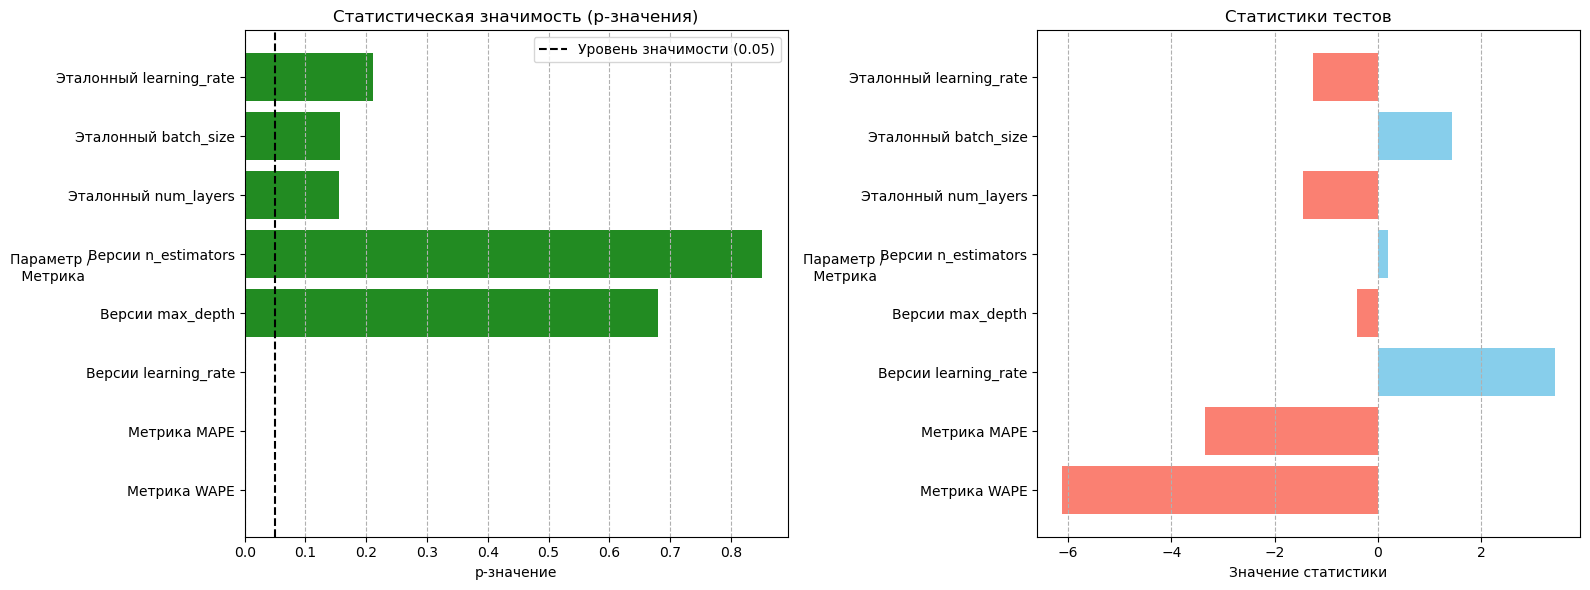

In [4]:
comparator = ModelComparator()

current_model_params = {
    'learning_rate': np.random.normal(0.012, 0.001, 30),
    'batch_size': np.random.randint(16, 64, 30),
    'num_layers': np.random.randint(2, 5, 30)
}

baseline_params = {
    'learning_rate': np.random.normal(0.012, 0.001, 30),
    'batch_size': np.random.randint(16, 64, 30),
    'num_layers': np.random.randint(2, 5, 30)
}

version1_params = {
    'n_estimators': np.random.randint(100, 200, 50),
    'max_depth': np.random.randint(5, 15, 50),
    'learning_rate': np.random.normal(0.05, 0.005, 50)
}

version2_params = {
    'n_estimators': np.random.randint(100, 200, 50),
    'max_depth': np.random.randint(5, 15, 50),
    'learning_rate': np.random.normal(0.048, 0.005, 50)
}

metrics_model_A = {
    'WAPE': np.random.normal(0.10, 0.001, 40),
    'MAPE': np.random.normal(0.15, 0.002, 40)
}

metrics_model_B = {
    'WAPE': np.random.normal(0.11, 0.01, 40),
    'MAPE': np.random.normal(0.16, 0.02, 40)
}

print("Сравнение текущей модели с эталонными параметрами (t-тест):")
comparator.compare_with_baseline(current_model_params, baseline_params, test_type='t-test')
print(comparator.get_results())
print("\n" + "="*50 + "\n")

print("Сравнение версий модели (z-тест для больших выборок):")
comparator.compare_versions(version1_params, version2_params, test_type='z-test')
print(comparator.get_results())
print("\n" + "="*50 + "\n")

print("Сравнение метрик моделей (t-тест):")
comparator.compare_metrics(metrics_model_A, metrics_model_B, test_type='t-test')
print(comparator.get_results())
print("\n" + "="*50 + "\n")

comparator.visualize_comparison()